## Introduction to Training Neural Networks

In this lesson, we'll cover the details of how to train a neural network and define a training loop. We'll cover:

- How to divide datasets
- Distinguish between underfitting and overfitting
- Techniques for optimizing training
- Choosing loss functions and optimizers for neural networks
- How to write training loops in PyTorch

  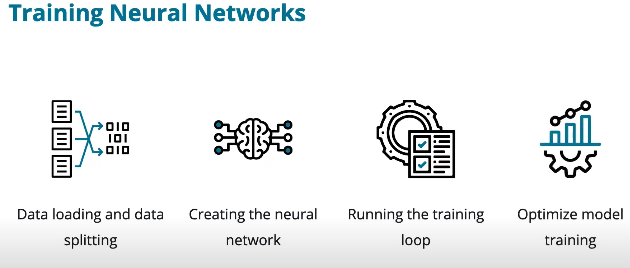

  Having a conceptual framework for neural networks is important, but so is actually training the models. In this lesson, we will learn how to:

- Distinguish between underfitting and overfitting
- Visualize our training with TensorBoard
- Optimize the training process with early stopping, regularization, dropout, random restarts, learning rate decay, and momentum
- Use PyTorch to build and train a neural network

### Training, Validation, and Testing

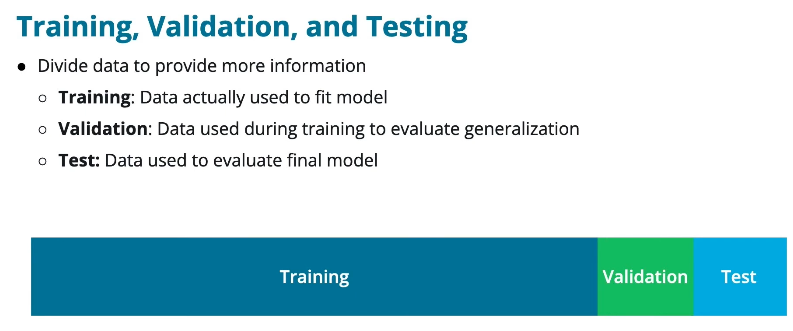

Another powerful approach is k-fold cross-validation, where the data is split up into some number, which we call k, equal parts. One is used as the validation set, one is used as the test set, and the remaining parts are used as the training set. We then cycle through all combinations of the data until all parts have had a chance to be the test set.

### Overfitting and Underfitting


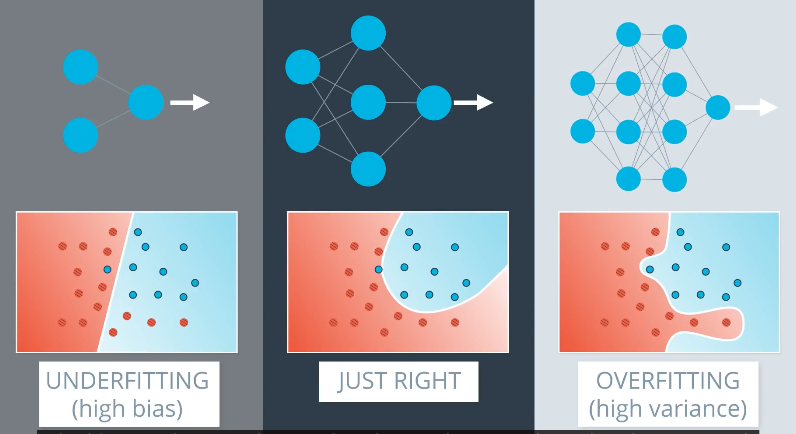

When we train our models, it is entirely possible to get them to a point where they perform very well on our training data—but then perform very poorly on our testing data. Two common reasons for this are underfitting and overfitting

__Underfitting__

Underfitting means that our model is too simplistic. There is a poor fit between our model and the data because we have oversimplified the problem.
Underfitting is sometimes referred to as error due to bias. Our training data may be biased and this bias may be incorporated into the model in a way that oversimplifies it.
For example, suppose we train an image classifier to recognize dogs. And suppose that the only type of animal in the training set is a dog. Perhaps the model learns a biased and overly simple rule like, "if it has four legs it is a dog". When we then test our model on some data that has other animals, it may misclassify a cat as a dog—in other words, it will underfit the data because it has error due to bias.

__Overfitting__

Overfitting means that our model is too complicated. The fit between our model and the training data is too specific—the model will perform very well on the training data but will fail to generalize to new data.
Overfitting is sometimes referred to as error due to variance. This means that there are random or irrelevant differences among the data points in our training data and we have fit the model so closely to these irrelevant differences that it performs poorly when we try to use it with our testing data.
For example, suppose we want our image classifier to recognize dogs, but instead we train it to recognize "dogs that are yellow, orange, or grey." If our testing set includes a dog that is brown, for example, our model will put it in a separate class, which was not what we wanted. Our model is too specific—we have fit the data to some unimportant differences in the training data and now it will fail to generalize.

__Applying This to Neural Networks__

Generally speaking, underfitting tends to happen with neural networks that have overly simple architecture, while overfitting tends to happen with models that are highly complex.

The bad news is, it's really hard to find the right architecture for a neural network. There is a tendency to create a network that either has overly simplistic architecture or overly complicated architecture. In general terms, the approach we will take is to err on the side of an overly complicated model, and then we'll apply certain techniques to reduce the risk of overfitting.

### How to stop over fitting is : Early Stopping

When training our neural network, we start with random weights in the first epoch and then change these weights as we go through additional epochs. Initially, we expect these changes to improve our model as the neural network fits the training data more closely. But after some time, further changes will start to result in overfitting.

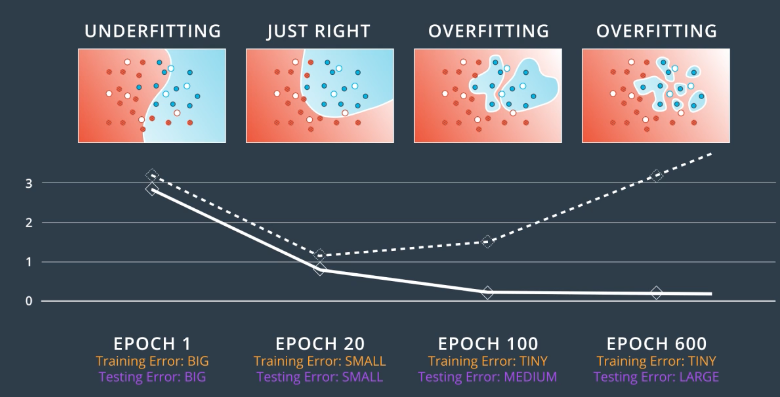

We can monitor this by measuring both the training error and the testing error. As we train the network, the training error will go down—but at some point, the testing error will start to increase. This indicates overfitting and is a signal that we should stop training the network prior to that point. We can see this relationship in a model complexity graph like this one:

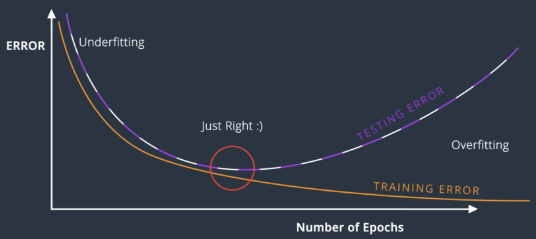

Have a look at the graph and make sure you can recognize the following:

- On the Y-axis, we have a measure of the error and on the X-axis we have a measure of the complexity of the model (in this case, it's the number of epochs).
- On the left we have high testing and training error, so we're underfitting.
- On the right, we have high testing error and low training error, so we're overfitting.
- Somewhere in the middle, we have our happy Goldilocks point (the point that is "just right").
  
In summary, we do gradient descent until the testing error stops decreasing and starts to increase. At that moment, we stop. This algorithm is called early stopping and is widely used to train neural networks.



### Regularization 

**Regularization** is a technique used to prevent **overfitting** in machine learning models. Overfitting happens when a model learns the noise and random fluctuations in the training data instead of the underlying patterns, which leads to poor performance on unseen data.

Regularization adds a **penalty term** to the loss function (which the model tries to minimize) to discourage overfitting and improve the model's generalization ability.

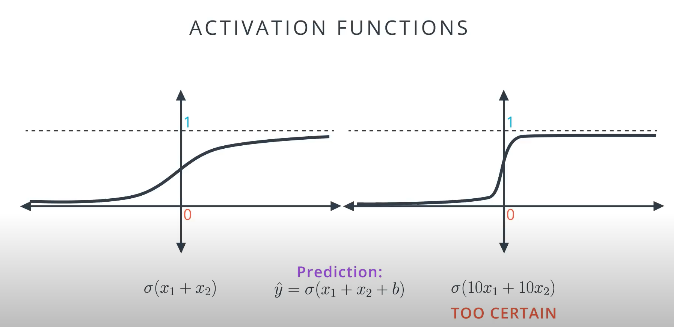 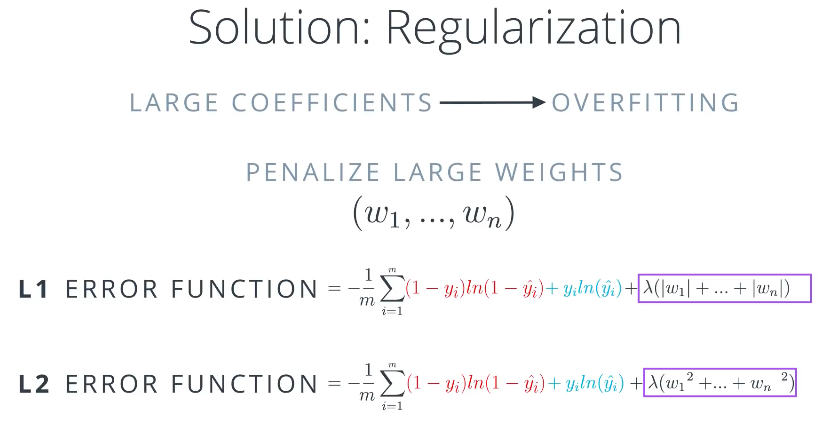 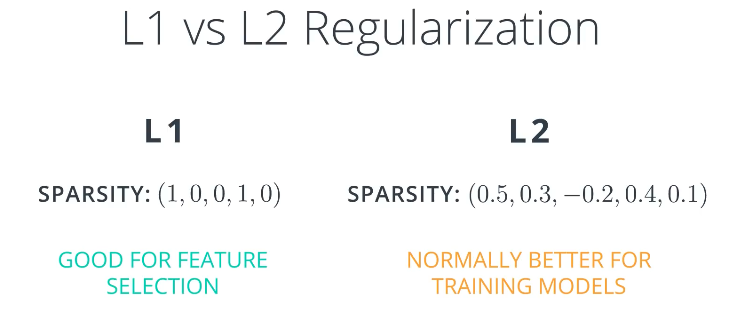 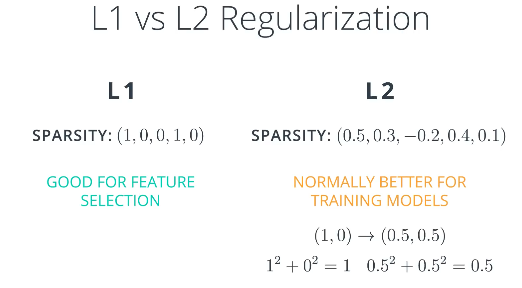
---

### Key Types of Regularization

#### 1. L1 Regularization (Lasso)
- Adds a penalty proportional to the **absolute value** of the weights.
- Encourages **sparsity** by driving some weights to zero, effectively performing feature selection.
- The penalty term added to the loss function is:

$$
Loss = Loss + \lambda \sum_{i} |w_i|
$$

Where \( \lambda \) is the regularization strength and \( w_i \) are the weights.

#### 2. L2 Regularization (Ridge)
- Adds a penalty proportional to the **square of the weights**.
- Encourages smaller weights, reducing model complexity without eliminating features.
- The penalty term added to the loss function is:

$$
Loss = Loss + \lambda \sum_{i} w_i^2
$$

L2 regularization spreads the importance of features more evenly.

#### 3. Elastic Net Regularization
- A combination of both **L1** and **L2** regularization.
- It encourages both feature selection (L1) and weight shrinkage (L2).
- The penalty term added to the loss function is:

$$
Loss = Loss + \lambda_1 \sum_{i} |w_i| + \lambda_2 \sum_{i} w_i^2
$$

---

### Other Regularization Techniques

#### 1. Dropout
- Randomly sets a fraction of the neurons to zero during training, preventing the network from becoming overly reliant on specific neurons.
- Forces the network to learn more robust patterns.

#### 2. Early Stopping
- Stops training once the model's performance on a validation set stops improving.
- Prevents the model from overfitting to the training data.

#### 3. Data Augmentation
- Increases the size and diversity of the training set by applying random transformations (like rotations, flips, etc.) to the data.
- This helps prevent overfitting by forcing the model to generalize better.

---

### Why Regularization is Important

- **Overfitting Prevention**: Regularization helps avoid overfitting by discouraging the model from focusing too much on specific details in the training data.
- **Model Simplicity**: Regularization encourages simpler models by penalizing large weights or unnecessary features, generally leading to better generalization on new data.

---

### Summary

- **Regularization** is a technique to prevent overfitting by adding a penalty to the model's loss function.
- **L1 Regularization** (Lasso) makes some weights zero, effectively performing feature selection.
- **L2 Regularization** (Ridge) shrinks all weights but doesn’t set them to zero.
- **Elastic Net** combines L1 and L2 regularization.
- Techniques like **Dropout**, **Early Stopping**, and **Data Augmentation** also help prevent overfitting.

Regularization is crucial for building models that perform well on unseen data and avoid overfitting to the training set.


# Implementing Regularization
In this exercise, you will implement both L1 and L2 regularization from scratch in NumPy. 
In PyTorch, L2 regularization is typically handled in the optimizer, via the `weight_decay` parameter, but we will also implement a manual L1 and L2 loss penalty in PyTorch. 

In [2]:
import numpy as np
import torch 
from torch import nn
from torch import optim 
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms 
from torchvision import datasets
import matplotlib.pyplot as plt

## L1 Regularization -- Numpy
L1 regularization is the sum of the absolute values of the weights times a scaling constant, lambda.
Below, you will define the function `l1_regularization` that accepts an input vector and a scalar constant, lambda.

**NOTE:** We use the variable name `lamb` rather than `lambda` since `lambda` is a keyword in Python. 

In [3]:
def l1_regularization(weights, lamb):
    absolute_weights = np.abs(weights)
    return lamb * np.sum(absolute_weights)

In [7]:
# Grading code. Run this cell to test your code!
grading_vector = np.array([1, -2, 3, -4])
assert l1_regularization(grading_vector, 0.5) == 5, f"Your L1 regularization implementation seems to be incorrect. Expected 5, got {l1_regularization(grading_vector, 0.5)}"
assert l1_regularization(grading_vector, 1) == 10, f"Your L1 regularization implementation seems to be incorrect. Expected 10, got {l1_regularization(grading_vector, 1)}"

print("Great work")

Great work


## L2 Regularization -- Numpy
L2 regularization squares the weights inside the vector and returns the sum of those squares times a scaling constant, lambda. 
Below, you will define the function `l2_regularization`, which accepts an input vector and a scalar constant, lambda.

In [8]:
def l2_regularization(weights, lamb):
    squared_weights = np.dot(weights, weights.T)
    return lamb * squared_weights


In [9]:
# Grading code. Run this cell to test your code!
grading_vector = np.array([0.5, -1, 1.5, -2])
assert l2_regularization(grading_vector, 0.5) == 3.75, f"Your L2 regularization implementation seems to be incorrect. Expected 3.75, got {l2_regularization(grading_vector, 0.5)}"
assert l2_regularization(grading_vector, 1) == 7.5, f"Your L2 regularization implementation seems to be incorrect. Expected 7.5, got {l2_regularization(grading_vector, 1)}"

print("Great work!")

Great work!


## Regularization in PyTorch
Although L2 regularization is typically handled via the `weight_decay` parameter in your optimizer, we can compute L1 and L2 regularization by hand. 
We do this by iterating over the parameters in our model using the `net.parameters()` method.

Rather than establishing a model, training it, and testing it, we will manually set the model weights.

In [10]:
# Setting up our net for testing
net = nn.Sequential(nn.Linear(4, 1, bias=False))
# Make it so autograd doesn't track our changes
with torch.no_grad():
    net[0].weight = nn.Parameter(torch.ones_like(net[0].weight))
    net[0].weight.fill_(2.0)

In [11]:
# Define L1 loss
def l1_torch(model, lamb):
    return lamb * sum([p.abs().sum() for p in model.parameters()])

# Define L2 loss
def l2_torch(model, lamb):
    return lamb * sum([(p**2).sum() for p in model.parameters()])

In [12]:
# Grading code
assert l1_torch(net, 1) == 8, f"There is something wrong with your L1 regularization implementation. Expected 8, got {l1_torch(net, 1)}"
assert l1_torch(net, 0.5) == 4, f"There is something wrong with your L1 regularization implementation. Expected 4, got {l1_torch(net, 0.5)}"

assert l2_torch(net, 1) == 16, f"There is something wrong with your L2 regularization implementation. Expected 16, got {l2_torch(net, 1)}"
assert l2_torch(net, 0.25) == 4, f"There is something wrong with your L2 regularization implementation. Expected 4, got {l2_torch(net, 0.25)}"

print("Great work!")

Great work!


## Dropout

Turning off Weights to Balance Training
When training a neural network, sometimes one part of the network has very large weights and it ends up dominating the training, while another part of the network doesn't really play much of a role (so it doesn't get trained).

To solve this, we can use a method called dropout in which we turn part of the network off and let the rest of the network train:

- We go through the epochs and randomly turn off some of the nodes. This forces the other nodes to pick up the slack and take a larger part in the training.
- To drop nodes, we give the algorithm a parameter that indicates the probability that each node will get dropped during each epoch. For example, if we set this parameter to 0.2, this means that during each epoch, each node has a 20% probability of being turned off.
- Note that some nodes may get turned off more than others and some may never get turned off. This is OK since we're doing it over and over; on average, each node will get approximately the same treatment.


## Local Minima and Random Restart

Getting Stuck in Local Minima
Gradient descent looks at the direction where it can most decrease the error and then it takes a step in that direction. However, if there are multiple low points in the solution space, gradient descent may end up leading us to local minima—solutions where the error is at the lowest point in the local area, but not the lowest point overall.

## Random Restart
One way to solve our problem is to use random restart. We start (and restart) from a few different random places and do gradient descend from all of them. This increases the probability that we'll get to the global minimum, or at least a pretty good local minimum.



### Gradients and Activation Functions

Both vanishing and exploding gradients are more common in deeper networks. However, the phenomena of vanishing and exploding gradients differ in one major way: they are caused by different properties of activation functions used in the hidden layers. So-called "saturating" activation functions -- those that have a bounded range, can cause vanishing gradients. Meanwhile, unbounded activation functions can cause exploding gradients.

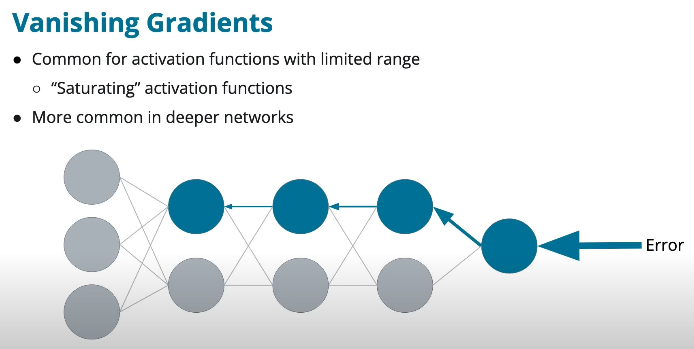 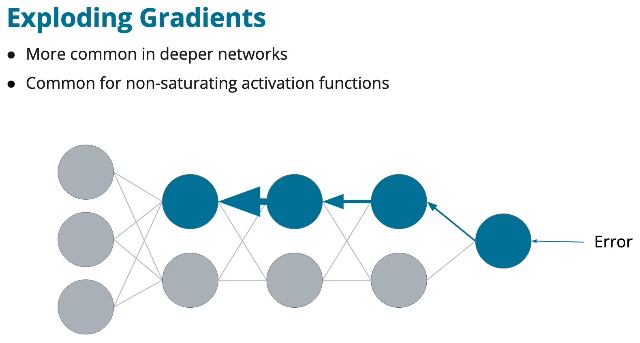 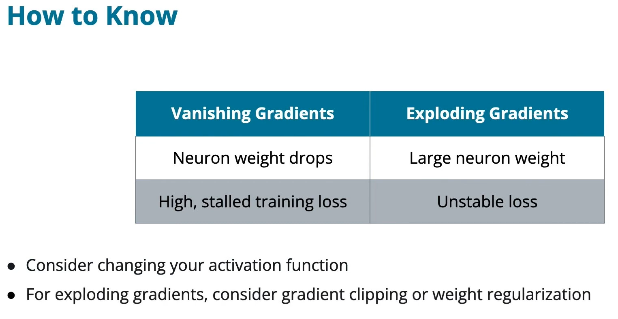 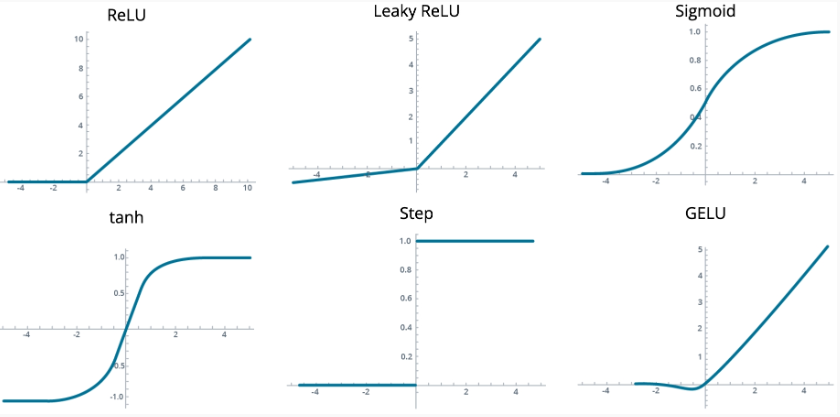





### Learning Rate Decay

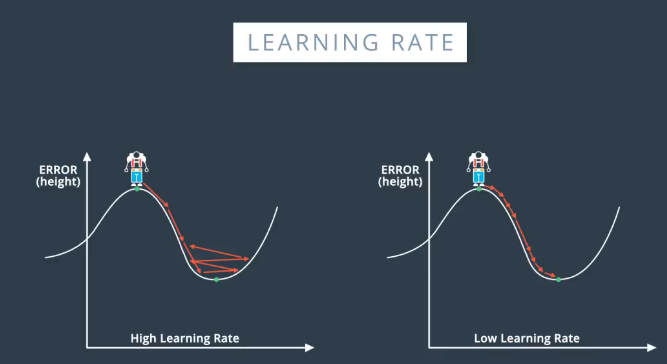 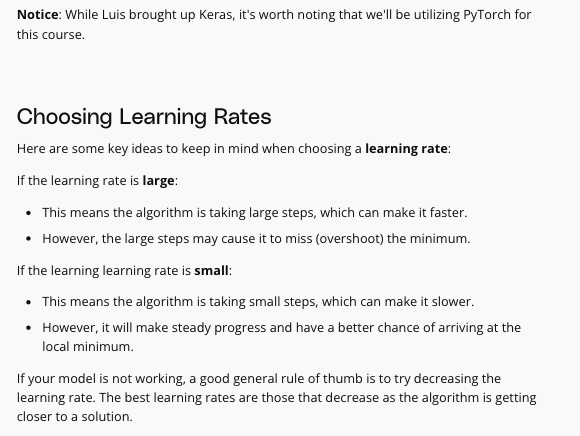


### Momentum

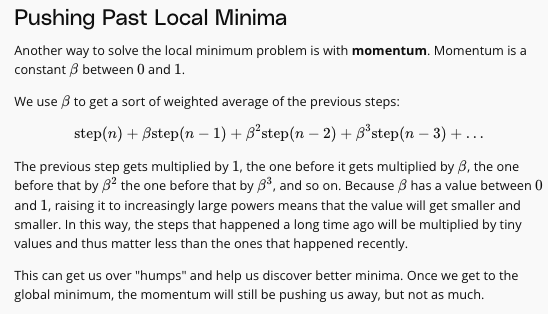 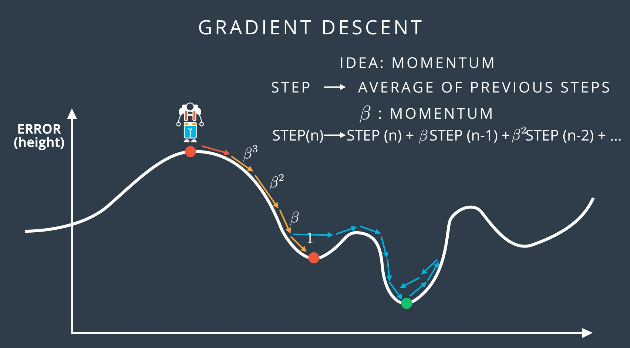

 ### Optimizers

__Choosing an Optimizer :__

Our choice of optimizer is not often the most important decision in training a model, but it can definitely make a difference. While Adam is a good default, the use of SGD is still common. The various optimizers available in PyTorch are covered in the torch.optim documentation


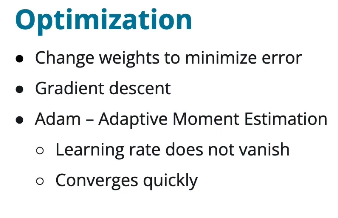

### Batch vs Stochastic Gradient Descent

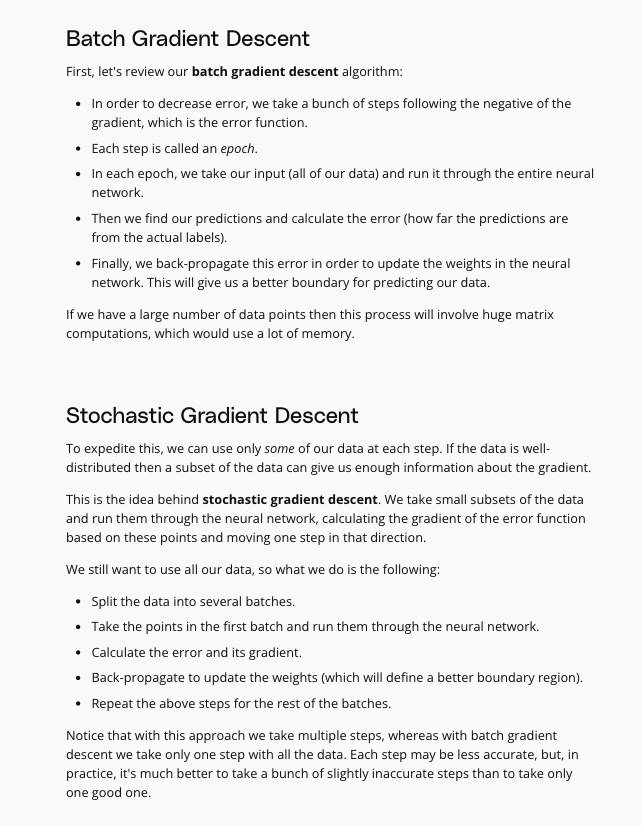


## Training Techniques in PyTorch


In [13]:
#Import Libraries 

import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms 
from torchvision import datasets

In [20]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5, ))])


training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(training_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16)



100%|██████████████████████████| 26421880/26421880 [00:05<00:00, 4685984.12it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████| 29515/29515 [00:00<00:00, 93644.60it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████| 4422102/4422102 [00:07<00:00, 608239.76it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 1829543.89it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Early Stopping
Early stopping in PyTorch to be implemented in our training loop some libraries, like PyTorch lightning and PyTorch Ignite, after an abstraction that makes early stopping easier


In [ ]:
# Training loop
def train_model(net, optimizer, criterion, train_loader, test_loader, num_epochs=8):

    # Set best validation loss to infinity, since we're going to monitor validation loss for improvement
    best_val_loss = float('inf')

    #Threashold for minimum performance improvement
    thresh = 0.001

    # How many times performance has follen below the threshold 
    below_threshold = 0

    # How many epochs we should allow performance improvement to fall below threshold 
    patience = 3

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training_accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')


    #Our early stopping will keep an eye on the validation loss for improvement 
    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)


        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()

        
        
            